In [611]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
%matplotlib inline

In [626]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import missingno as msno
from bokeh.core.properties import value
from bokeh.io import show,output_notebook
from bokeh.plotting import figure
from bokeh.models import (
    ColumnDataSource,
    
    HoverTool,
    LogColorMapper
)
from scipy.stats import boxcox
from bokeh.palettes import Viridis6 as palette
from bokeh.layouts import row
from sklearn.linear_model import ElasticNet, LinearRegression as lr
from sklearn.ensemble import GradientBoostingRegressor as gbr, RandomForestRegressor as rfr
from preprocess import impute1
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
%matplotlib inline

In [627]:
train_df = pd.read_csv('X_train1st.csv')
test_df = pd.read_csv('X_test1st.csv')
y_train = pd.read_csv('y_train1st.csv')
X_test_MiscVal = pd.read_csv('test_MiscVal.csv')
train_df.head()

,Id,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageCars,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,Neighborhood,OpenPorchSF,OverallQual,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearRemodAdd,Remodornot,poolornot,Alley_None,Alley_Pave,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,...,MSZoning_RL,MSZoning_RM,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,PavedDrive_P,PavedDrive_Y,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SalePrice
0,0,6.753438,6.751101,0.0,3,6.561031,0,1,0,5.017280,0.000000,0,2,2,41.352146,1,1,9.042040,4.189655,0.0,5.283204,0,CollgCr,4.127134,7,0.0,8,6.753438,0.000000,2003,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,12.247694
1,1,7.141245,0.000000,0.0,3,6.886532,0,0,1,5.652489,0.000000,1,2,2,35.524639,0,1,9.169623,4.394449,0.0,0.000000,0,Veenker,0.000000,6,0.0,6,7.141245,5.700444,1976,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,12.109011
2,2,6.825460,6.765039,0.0,3,6.188264,0,1,0,6.075346,0.000000,1,2,2,42.261093,1,1,9.328212,4.234107,0.0,5.093750,0,CollgCr,3.761200,7,0.0,6,6.825460,0.000000,2002,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,12.317167
3,3,6.869014,6.629363,0.0,3,5.379897,0,1,0,6.293419,5.609472,1,1,3,41.436699,0,1,9.164401,4.110874,0.0,0.000000,0,Crawfor,3.583519,7,0.0,7,6.629363,0.000000,1970,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,11.849398
4,4,7.044033,6.960348,0.0,4,6.486161,0,1,0,6.196444,0.000000,1,2,3,46.882833,1,1,9.565284,4.442651,0.0,5.860786,0,NoRidge,4.442651,8,0.0,9,7.044033,5.262690,2000,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,12.429216


In [628]:
test_df.shape

(1459, 234)

In [629]:
test_df.head()

,Unnamed: 0,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageCars,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,Neighborhood,OpenPorchSF,OverallQual,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearRemodAdd,Remodornot,poolornot,Alley_None,Alley_Pave,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,...,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,PavedDrive_P,PavedDrive_Y,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,0,6.799056,0.000000,0.0,2,6.150603,144.0,0.0,0.0,5.602119,0.0,0,1,1.0,29.933259,0,1,9.360741,4.394449,0.0,0.000000,0,NAmes,0.000000,5,4.795791,5,6.783325,4.948760,1961,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1
1,1,7.192934,0.000000,0.0,3,6.828712,0.0,0.0,0.0,6.008813,0.0,0,1,1.0,36.455452,1,1,9.565775,4.406719,0.0,4.691348,12500,NAmes,3.610918,6,0.000000,6,7.192934,5.976351,1958,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1
2,2,6.834109,6.553933,0.0,3,6.674561,0.0,0.0,0.0,4.927254,0.0,1,2,2.0,40.360872,1,1,9.534668,4.317488,0.0,0.000000,0,Gilbert,3.555348,5,0.000000,6,6.834109,5.361292,1998,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1
3,3,6.831954,6.520621,0.0,3,6.401917,0.0,0.0,0.0,5.783825,0.0,1,2,2.0,40.049969,1,1,9.208238,4.369448,0.0,3.044522,0,Gilbert,3.610918,6,0.000000,7,6.831954,5.888878,1998,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1
4,4,7.155396,0.000000,0.0,2,5.575949,0.0,0.0,0.0,6.925595,0.0,0,2,2.0,35.777088,0,1,8.518392,3.784190,0.0,0.000000,0,StoneBr,4.418841,8,4.976734,5,7.155396,0.000000,1992,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1


In [630]:
train_df = train_df.rename(columns={'Unnamed: 0': 'Id'})
test_df = test_df.rename(columns={'Unnamed: 0': 'Id'})
test_df["Id"] = range(1461,2920)
test_df.head()

,Id,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageCars,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,Neighborhood,OpenPorchSF,OverallQual,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearRemodAdd,Remodornot,poolornot,Alley_None,Alley_Pave,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,...,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,PavedDrive_P,PavedDrive_Y,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,1461,6.799056,0.000000,0.0,2,6.150603,144.0,0.0,0.0,5.602119,0.0,0,1,1.0,29.933259,0,1,9.360741,4.394449,0.0,0.000000,0,NAmes,0.000000,5,4.795791,5,6.783325,4.948760,1961,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1
1,1462,7.192934,0.000000,0.0,3,6.828712,0.0,0.0,0.0,6.008813,0.0,0,1,1.0,36.455452,1,1,9.565775,4.406719,0.0,4.691348,12500,NAmes,3.610918,6,0.000000,6,7.192934,5.976351,1958,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1
2,1463,6.834109,6.553933,0.0,3,6.674561,0.0,0.0,0.0,4.927254,0.0,1,2,2.0,40.360872,1,1,9.534668,4.317488,0.0,0.000000,0,Gilbert,3.555348,5,0.000000,6,6.834109,5.361292,1998,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1
3,1464,6.831954,6.520621,0.0,3,6.401917,0.0,0.0,0.0,5.783825,0.0,1,2,2.0,40.049969,1,1,9.208238,4.369448,0.0,3.044522,0,Gilbert,3.610918,6,0.000000,7,6.831954,5.888878,1998,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1
4,1465,7.155396,0.000000,0.0,2,5.575949,0.0,0.0,0.0,6.925595,0.0,0,2,2.0,35.777088,0,1,8.518392,3.784190,0.0,0.000000,0,StoneBr,4.418841,8,4.976734,5,7.155396,0.000000,1992,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1


In [631]:
# Save the 'Id' column
train_ID = train_df['Id']
test_ID = test_df['Id']

# Now drop the 'Id' colum since we can not use it as a feature to train our model.
#train_df.drop("Id", axis = 1, inplace = True)
#test_df.drop("Id", axis = 1, inplace = True)

In [632]:
#y_train = train_df['SalePrice']
X_train = train_df
X_test = test_df.copy()

In [633]:
del train_df, test_df

In [634]:
print(X_train.shape)
print(X_test.shape)

(1460, 235)
(1459, 234)


In [635]:
# f, ax = plt.subplots(figsize=(18, 15))
# ax = sns.boxplot(x=X_train["Neighborhood"], y=X_train["SalePrice"], data=X_train)

## Train Valildation Split

In [636]:
# Save the 'MiscVal' column
# X_test_MiscVal = X_test['MiscVal']

# # Now drop the 'MiscVal' column since we won't use it to train our model.
# X_train.drop("MiscVal", axis = 1, inplace = True)
# X_test.drop("MiscVal", axis = 1, inplace = True)

In [637]:
y_train = y_train['0']

In [638]:
# train-test split
from sklearn.model_selection import train_test_split
X_train_train, X_val, y_train_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2)

In [639]:
len(X_train_train)/len(X_val)

4.0

In [640]:
X_val.shape

(292, 235)

In [641]:
y_train.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: 0, dtype: float64

In [642]:
from sklearn import linear_model

In [643]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import validation_curve
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV
X, y = X_train_train, y_train_train

Automatically created module for IPython interactive environment


In [644]:
y_train = pd.read_csv('y_train1st.csv')
y_train = y_train

### Elastic

/Users/tianyigu/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tianyigu/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tianyigu/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tianyigu/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

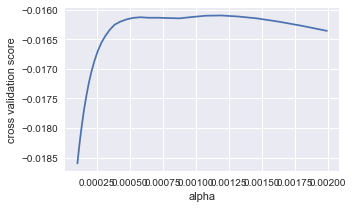

In [502]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
alphas = np.logspace(-4, -2.7, 30)

plt.figure(figsize=(5, 3))

scores = [cross_val_score(linear_model.ElasticNet(alpha), X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean() for alpha in alphas]
plt.plot(alphas, scores)
 
plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()

In [503]:
El = linear_model.ElasticNet()

In [504]:
# grid_research = [{
#     "alpha" : np.logspace(-5, -3, 100),
#     "l1_ratio" : np.arange(0.0, 1.0, 0.1)
# }]
# grid_research_re = model_selection.GridSearchCV(El,grid_research, scoring = "neg_mean_squared_error",cv = 5, n_jobs = -1)
# %time grid_research_re.fit(X_train,y_train)

In [505]:
grid_research1 = [{
    "alpha" : np.logspace(-4, -2.7, 50),
    "l1_ratio" : np.arange(0.3, 1.0, 0.05)
}]
grid_research_re1 = model_selection.GridSearchCV(El,grid_research1, scoring = "neg_mean_squared_error",cv = 5, n_jobs = -1)
%time grid_research_re1.fit(X_train,y_train)

/Users/tianyigu/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tianyigu/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tianyigu/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tianyigu/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/Users/tianyigu/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tianyigu/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tianyigu/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tianyigu/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/Users/tianyigu/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tianyigu/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tianyigu/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tianyigu/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

CPU times: user 14.6 s, sys: 607 ms, total: 15.2 s
Wall time: 1min 43s


GridSearchCV(cv=5, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'alpha': array([ 0.0001 ,  0.00011,  0.00011,  0.00012,  0.00013,  0.00014,
        0.00014,  0.00015,  0.00016,  0.00017,  0.00018,  0.0002 ,
        0.00021,  0.00022,  0.00024,  0.00025,  0.00027,  0.00028,
        0.0003 ,  0.00032,  0.00034,  0.00036,  0.00038,  0.00041,
        0.... 0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,
        0.75,  0.8 ,  0.85,  0.9 ,  0.95])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [506]:
grid_research_re1.best_params_

{'alpha': 0.001382981359549522, 'l1_ratio': 0.39999999999999997}

In [507]:
El_best = linear_model.ElasticNet(alpha=0.001382981359549522, l1_ratio=0.4)

In [508]:
El_best.fit(X_train, y_train)

ElasticNet(alpha=0.001382981359549522, copy_X=True, fit_intercept=True,
      l1_ratio=0.4, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [519]:
coef_ridge_2 = pd.concat([pd.Series(El_best.coef_, name='coef'), pd.Series(X_train.columns,
                                                                                     name='Features')], axis=1)
coef_ridge_2.loc[El_best.coef_!=0,:].sort_values(by='coef', ascending=False)

,coef,Features
25,0.207368,GrLivArea
171,0.095002,Neighborhood_StoneBr
155,0.092007,Neighborhood_Crawfor
165,0.086964,Neighborhood_NridgHt
164,0.085657,Neighborhood_NoRidge
30,0.069333,LotArea
204,0.067522,SaleType_New
36,0.059640,OverallQual
170,0.057058,Neighborhood_Somerst
197,0.056642,SaleCondition_Normal


In [510]:
pred_ELtest = El_best.predict(X_test)
pred_ELtest

array([ 11.63301009,  11.89634019,  12.0775544 , ...,  12.02684852,
        11.66200905,  12.32745647])

In [511]:
pred_testel_final = pd.DataFrame(np.exp(pred_ELtest),columns =["SalePrice"])
pred_testel_final["SalePrice"] = pred_testel_final["SalePrice"] + X_test_MiscVal["MiscVal"]


In [512]:
pred_testel_final = pred_testel_final.assign(Id = test_ID)
pred_testel_final.to_csv('elast1st.csv',index=False)

### XGBooot

In [ ]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                              nthread = -1)

In [ ]:
xg_best = model_xgb.fit(X_train, y_train)
pred_xg = xg_best.predict(X_test)
pred_xg_final = pd.DataFrame(np.exp(pred_xg),columns =["SalePrice"])
pred_xg_final["SalePrice"] = pred_xg_final["SalePrice"] + X_test_MiscVal["MiscVal"]
pred_xg_final = pred_xg_final.assign(Id = test_ID)
pred_xg_final.to_csv('xg1st.csv',index=False)

In [ ]:
el_best = linear_model.ElasticNet(alpha = regr.alpha_ )
el_best.fit(X_train, y_train)

In [ ]:
el_best.score(X_train, y_train)

In [ ]:
# plot validation curves
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

X, y = X_train_train, y_train_train

param_range = np.logspace(-1, 1.5, 100)
train_scores, test_scores = validation_curve(
    linear_model.ElasticNet(normalize=True,l1_ratio=0.5), X, y, param_name="alpha", param_range=param_range,
    cv=5, scoring="neg_mean_squared_error", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.semilogx(param_range,pd.DataFrame({'train' : train_scores_mean, 'test' : test_scores_mean}))
plt.show()

plt.show()

## Ridge Regression

Automatically created module for IPython interactive environment


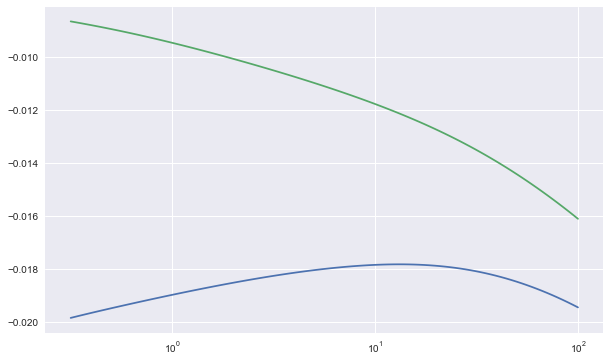

In [536]:
# plot validation curves
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

X, y = X_train_train, y_train_train

param_range = np.logspace(-0.5, 2, 100)
train_scores, test_scores = validation_curve(
    linear_model.Ridge(), X, y, param_name="alpha", param_range=param_range,
    cv=5, scoring="neg_mean_squared_error", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.semilogx(param_range,pd.DataFrame({'train' : train_scores_mean, 'test' : test_scores_mean}))
plt.show()

plt.show()

In [537]:
param_range[np.argmax(test_scores_mean)]

13.066570504423456

In [538]:
rm_best = linear_model.Ridge(alpha = param_range[np.argmax(test_scores_mean)])

In [539]:
rm_best.fit(X_train_train, y_train_train)

Ridge(alpha=13.066570504423456, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [540]:
pred_val = rm_best.predict(X_val)

In [541]:
np.sqrt(np.mean((pred_val - y_val)**2))

0.12235057651970276

In [542]:
rm_best.fit(X_train, y_train)

Ridge(alpha=13.066570504423456, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [543]:
pred_test = rm_best.predict(X_test)
pred_test

array([ 11.63971572,  11.90094386,  12.06976986, ...,  12.02117381,
        11.66558198,  12.32739355])

In [546]:
coef_ridge_2 = pd.concat([pd.Series(rm_best.coef_, name='coef'), pd.Series(X_train.columns,
                                                                                     name='Features')], axis=1)
coef_ridge_2.loc[rm_best.coef_!=0,:].sort_values(by='coef', ascending=False)

,coef,Features
25,0.162100,GrLivArea
171,0.076008,Neighborhood_StoneBr
155,0.075020,Neighborhood_Crawfor
164,0.071202,Neighborhood_NoRidge
165,0.070586,Neighborhood_NridgHt
30,0.067832,LotArea
197,0.061110,SaleCondition_Normal
188,0.058766,RoofMatl_WdShngl
36,0.057727,OverallQual
141,0.057624,MSZoning_RL


In [357]:
pred_test_final = pd.DataFrame(np.exp(pred_test),columns =["SalePrice"])
pred_test_final["SalePrice"] = pred_test_final["SalePrice"] + X_test_MiscVal["MiscVal"]
pred_test_final = pred_test_final.assign(Id = test_ID)

In [359]:
pred_test_final.to_csv('rd1st.csv',index=False)

In [ ]:
X_train_train

## Lasso Regression

Automatically created module for IPython interactive environment


/Users/tianyigu/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tianyigu/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tianyigu/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tianyigu/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/Users/tianyigu/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tianyigu/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


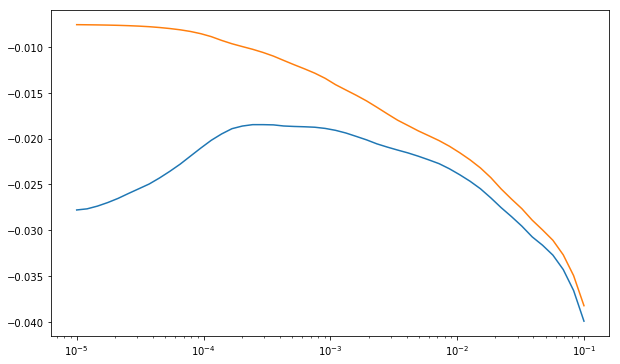

In [368]:
# plot validation curves
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

X, y = X_train_train, y_train_train

param_range = np.logspace(-5, -1, 50)
train_scores, test_scores = validation_curve(
    linear_model.Lasso(), X, y, param_name="alpha", param_range=param_range,
    cv=5, scoring="neg_mean_squared_error", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.semilogx(param_range,pd.DataFrame({'train' : train_scores_mean, 'test' : test_scores_mean}))
plt.show()

plt.show()

In [370]:
lm_best = linear_model.Lasso(alpha = param_range[np.argmax(test_scores_mean)])
param_range[np.argmax(test_scores_mean)]

In [371]:
lm_best.fit(X_train_train, y_train_train)

Lasso(alpha=0.00029470517025518097, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [372]:
lm_best.coef_

array([  1.79900030e-02,  -8.65912337e-03,   5.57970547e-03,
        -2.64867850e-03,   0.00000000e+00,   1.58618115e-02,
         7.00328258e-03,   2.97663739e-05,   2.33495479e-03,
        -3.46661626e-03,   2.57403723e-02,   8.83033500e-03,
         1.50216313e-02,  -6.63284282e-03,   0.00000000e+00,
        -4.38468859e-03,   1.54772346e-02,   5.20825307e-03,
         1.07844109e-02,   3.77914250e-02,   3.76780606e-02,
         4.75726140e-02,   4.33634754e-03,   1.62112182e-02,
         2.09644296e-02,   3.39999078e-02,   1.27605542e-02,
        -4.16042440e-02,   2.29797645e-02,   7.30283523e-02,
         0.00000000e+00,  -1.69495124e-02,  -1.66330510e-03,
        -5.64712641e-06,   2.75725988e-03,   5.51812288e-02,
         1.65205736e-02,   9.74223306e-03,   6.55094335e-03,
         9.77649029e-03,   2.06642359e-03,   1.14871559e-03,
         1.19032482e-02,  -1.18369790e-01,   2.49407800e-03,
         1.39781854e-03,   0.00000000e+00,   0.00000000e+00,
        -1.31741014e-02,

In [374]:
pred_val = lm_best.predict(X_val)
np.sqrt(np.mean((pred_val - y_val)**2))

0.12849938493786503

In [839]:
y_val

503     12.574182
101     12.089539
608     12.791356
1089    12.190959
819     12.319401
684     12.305918
1280    12.332705
920     12.211060
1453    11.344507
540     12.660328
421     12.278393
333     12.240474
363     11.678440
1308    11.898188
1404    11.561716
69      12.323856
1037    12.567237
332     12.556730
848     12.388394
1175    12.560244
1442    12.644328
755     12.058153
1435    12.066811
929     12.310433
58      12.991753
748     12.469974
662     11.608236
1043    12.477168
143     12.225875
349     12.988041
1036    12.661914
959     11.951180
226     12.577636
464     11.728037
1329    12.081076
756     12.264342
311     11.790557
990     12.759958
877     12.765688
664     12.955127
356     12.061047
598     12.289954
606     11.931636
696     11.396392
788     11.588960
1008    12.388394
68      11.289782
1130    11.813030
241     11.612771
556     11.856515
14      11.964001
323     11.745425
776     12.308178
1124    12.007012
1113    11.809319
926     12

In [375]:
lm_best.fit(X_train, y_train)

Lasso(alpha=0.00029470517025518097, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [376]:
pred_test = lm_best.predict(X_test)
pred_test

array([ 11.65787243,  11.8723705 ,  12.08656769, ...,  12.02955921,
        11.68321315,  12.32980862])

In [382]:
pred_test_final = pd.DataFrame(np.exp(pred_test),columns =["Price"])
pred_test_final.head()

,Price
0,115597.826574
1,143253.418179
2,177471.922692
3,193873.198672
4,206700.789457


In [378]:
pred_test_final = pd.DataFrame(np.exp(pred_test),columns =["Price"])
pred_test_final["Price"] = pred_test_final["Price"] + X_test_MiscVal["MiscVal"]

In [379]:
#pred_test_final = pd.DataFrame({'SalePrice': np.exp(pred_test/100) + X_test_MiscVal})

In [380]:
pred_test_final = pred_test_final.assign(Id = test_ID)

In [381]:
pred_test_final.to_csv('lr2_yq.csv',index=False)

## Black tec

In [801]:
high = ['Crawfor','NoRidge','NridgHt','StoneBr']
midhigh = ['Veenker','BrkSide','Timber','ClearCr','BrDale',"Blmngtn",'Somerst']
mid = ['CollgCr','SawyerW']
mid1 = ['Mitchel','Gilbert','NWAmes']
mid2 = ['SWISU','BrDale','NPkVill','Blueste','Sawyer','NAmes',"MeadowV"]
low = ["OldTown",'IDOTRR']

In [802]:
X_train.loc[X_train['Neighborhood'].isin(high),'Neighborhood']='high'
X_train.loc[X_train['Neighborhood'].isin(midhigh),'Neighborhood']='midhigh'
X_train.loc[X_train['Neighborhood'].isin(mid),'Neighborhood']='mid'
X_train.loc[X_train['Neighborhood'].isin(mid1),'Neighborhood']='mid1'
X_train.loc[X_train['Neighborhood'].isin(mid2),'Neighborhood']='mid2'
X_train.loc[X_train['Neighborhood'].isin(low),'Neighborhood']='low'

In [803]:
X_test.loc[X_test['Neighborhood'].isin(high),'Neighborhood']='high'
X_test.loc[X_test['Neighborhood'].isin(midhigh),'Neighborhood']='midhigh'
X_test.loc[X_test['Neighborhood'].isin(mid),'Neighborhood']='mid'
X_test.loc[X_test['Neighborhood'].isin(mid1),'Neighborhood']='mid1'
X_test.loc[X_test['Neighborhood'].isin(mid2),'Neighborhood']='mid2'
X_test.loc[X_test['Neighborhood'].isin(low),'Neighborhood']='low'

In [804]:
et.shape

(96, 233)

In [ ]:
e f        b

In [805]:
X_train.head()

,Id,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageCars,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,Neighborhood,OpenPorchSF,OverallQual,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearRemodAdd,Remodornot,poolornot,Alley_None,Alley_Pave,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,...,MSZoning_RL,MSZoning_RM,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,PavedDrive_P,PavedDrive_Y,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SalePrice
0,0,6.753438,6.751101,0.0,3,6.561031,0,1,0,5.017280,0.000000,0,2,2,41.352146,1,1,9.042040,4.189655,0.0,5.283204,0,mid,4.127134,7,0.0,8,6.753438,0.000000,2003,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,12.247694
1,1,7.141245,0.000000,0.0,3,6.886532,0,0,1,5.652489,0.000000,1,2,2,35.524639,0,1,9.169623,4.394449,0.0,0.000000,0,midhigh,0.000000,6,0.0,6,7.141245,5.700444,1976,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,12.109011
2,2,6.825460,6.765039,0.0,3,6.188264,0,1,0,6.075346,0.000000,1,2,2,42.261093,1,1,9.328212,4.234107,0.0,5.093750,0,mid,3.761200,7,0.0,6,6.825460,0.000000,2002,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,12.317167
3,3,6.869014,6.629363,0.0,3,5.379897,0,1,0,6.293419,5.609472,1,1,3,41.436699,0,1,9.164401,4.110874,0.0,0.000000,0,high,3.583519,7,0.0,7,6.629363,0.000000,1970,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,11.849398
4,4,7.044033,6.960348,0.0,4,6.486161,0,1,0,6.196444,0.000000,1,2,3,46.882833,1,1,9.565284,4.442651,0.0,5.860786,0,high,4.442651,8,0.0,9,7.044033,5.262690,2000,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,12.429216


In [806]:
neibfactor = list(X_train['Neighborhood'].unique())
neibfactor

['mid', 'midhigh', 'high', 'mid1', 'low', 'mid2', 'Edwards']

In [807]:
a = X_train[X_train["Neighborhood"]=='mid']
b = X_train[X_train["Neighborhood"]=='midhigh']
c = X_train[X_train["Neighborhood"]=='high']
d = X_train[X_train["Neighborhood"]=='mid1']
#e = X_train[X_train["Neighborhood"]=='Somerst']
#f = X_train[X_train["Neighborhood"]=='NWAmes']
g = X_train[X_train["Neighborhood"]=='low']
h = X_train[X_train["Neighborhood"]=='mid2']
i = X_train[X_train["Neighborhood"]=='Edwards']

In [808]:
at = X_test[X_test["Neighborhood"]=='mid']
bt = X_test[X_test["Neighborhood"]=='midhigh']
ct = X_test[X_test["Neighborhood"]=='high']
dt = X_test[X_test["Neighborhood"]=='mid1']
#et = X_test[X_test["Neighborhood"]=='Somerst']
#ft = X_test[X_test["Neighborhood"]=='NWAmes']
gt = X_test[X_test["Neighborhood"]=='low']
ht = X_test[X_test["Neighborhood"]=='mid2']
it = X_test[X_test["Neighborhood"]=='Edwards']

In [809]:
a_ID = a['Id']
b_ID = b['Id']
c_ID = c['Id']
d_ID = d['Id']
#e_ID = e['Id']
#f_ID = f['Id']
g_ID = g['Id']
h_ID = h['Id']
i_ID = i['Id']
a_ID.head()

0      0
2      2
13    13
18    18
22    22
Name: Id, dtype: int64

In [810]:
at_ID = pd.DataFrame(at['Id']).reset_index(drop=True)
bt_ID = pd.DataFrame(bt['Id']).reset_index(drop=True)
ct_ID = pd.DataFrame(ct['Id']).reset_index(drop=True)
dt_ID = pd.DataFrame(dt['Id']).reset_index(drop=True)
#et_ID = pd.DataFrame(et['Id']).reset_index(drop=True)
#ft_ID = pd.DataFrame(ft['Id']).reset_index(drop=True)
gt_ID = pd.DataFrame(gt['Id']).reset_index(drop=True)
ht_ID = pd.DataFrame(ht['Id']).reset_index(drop=True)
it_ID = pd.DataFrame(it['Id']).reset_index(drop=True)
at_ID.head()

,Id
0,1491
1,1492
2,1575
3,1576
4,1577


In [811]:
y_a = a['SalePrice']
y_b = b['SalePrice']
y_c = c['SalePrice']
y_d = d['SalePrice']
#y_e = e['SalePrice']
#y_f = f['SalePrice']
y_g = g['SalePrice']
y_h = h['SalePrice']
y_i = i['SalePrice']

In [812]:
y_a.head()

0     12.247694
2     12.317167
13    12.540758
18    11.976659
22    12.345835
Name: SalePrice, dtype: float64

In [813]:
a = a.drop(['SalePrice'], axis=1)
b = b.drop(['SalePrice'], axis=1)
c = c.drop(['SalePrice'], axis=1)
d = d.drop(['SalePrice'], axis=1)
#e = e.drop(['SalePrice'], axis=1)
#f = f.drop(['SalePrice'], axis=1)
g = g.drop(['SalePrice'], axis=1)
h = h.drop(['SalePrice'], axis=1)
i = i.drop(['SalePrice'], axis=1)

In [814]:
a = a.drop(['Neighborhood'], axis=1)
b = b.drop(['Neighborhood'], axis=1)
c = c.drop(['Neighborhood'], axis=1)
d = d.drop(['Neighborhood'], axis=1)
#e = e.drop(['Neighborhood'], axis=1)
#f = f.drop(['Neighborhood'], axis=1)
g = g.drop(['Neighborhood'], axis=1)
h = h.drop(['Neighborhood'], axis=1)
i = i.drop(['Neighborhood'], axis=1)
at = at.drop(['Neighborhood'], axis=1)
bt = bt.drop(['Neighborhood'], axis=1)
ct = ct.drop(['Neighborhood'], axis=1)
dt = dt.drop(['Neighborhood'], axis=1)
#et = et.drop(['Neighborhood'], axis=1)
#ft = ft.drop(['Neighborhood'], axis=1)
gt = gt.drop(['Neighborhood'], axis=1)
ht = ht.drop(['Neighborhood'], axis=1)
it = it.drop(['Neighborhood'], axis=1)

Automatically created module for IPython interactive environment


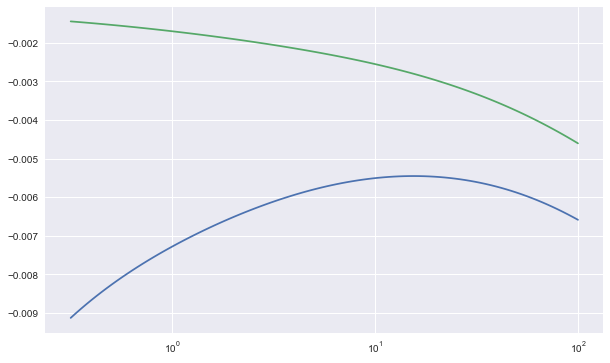

In [815]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

X, y = a, y_a

param_range = np.logspace(-0.5, 2, 100)
train_scores, test_scores = validation_curve(
    linear_model.Ridge(), X, y, param_name="alpha", param_range=param_range,
    cv=5, scoring="neg_mean_squared_error", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.semilogx(param_range,pd.DataFrame({'train' : train_scores_mean, 'test' : test_scores_mean}))
plt.show()

plt.show()

In [817]:
balck = linear_model.Ridge(alpha = param_range[np.argmax(test_scores_mean)])
balck.fit(a, y_a)
param_range[np.argmax(test_scores_mean)]


15.556761439304715

In [818]:
balck_pre = balck.predict(at)
balck_pre_final = pd.DataFrame(np.exp(balck_pre),columns =["SalePrice"])
balck_pre_finala = pd.concat([balck_pre_final,at_ID],axis=1)
balck_pre_finala.head()

,SalePrice,Id
0,195561.463861,1491
1,90788.726675,1492
2,226964.828331,1575
3,229377.008808,1576
4,183161.914397,1577


Automatically created module for IPython interactive environment


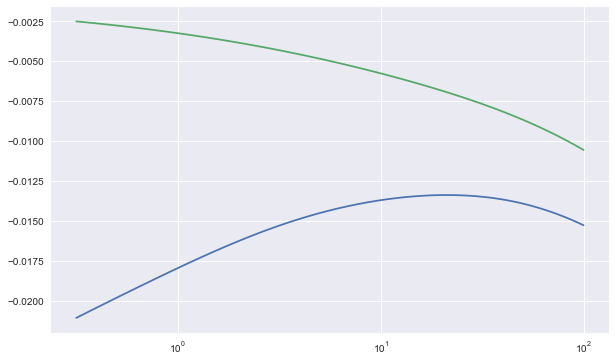

In [819]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

X, y = b, y_b

param_range = np.logspace(-0.5, 2, 100)
train_scores, test_scores = validation_curve(
    linear_model.Ridge(), X, y, param_name="alpha", param_range=param_range,
    cv=5, scoring="neg_mean_squared_error", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.semilogx(param_range,pd.DataFrame({'train' : train_scores_mean, 'test' : test_scores_mean}))
plt.show()

plt.show()

In [820]:
balck = linear_model.Ridge(alpha = param_range[np.argmax(test_scores_mean)])
balck.fit(b, y_b)
param_range[np.argmax(test_scores_mean)]

20.805675382171703

In [821]:
balck_pre = balck.predict(bt)
balck_pre_final = pd.DataFrame(np.exp(balck_pre),columns =["SalePrice"])
balck_pre_finalb = pd.concat([balck_pre_final,bt_ID],axis=1)
balck_pre_finalb.head()

,SalePrice,Id
0,99171.195098,1472
1,94029.339108,1473
2,163756.721934,1484
3,226906.911943,1488
4,193105.117525,1489


Automatically created module for IPython interactive environment


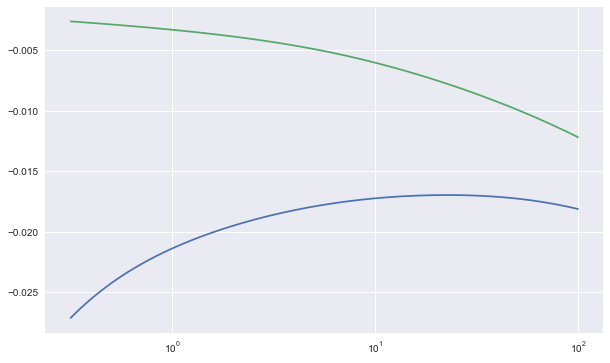

In [822]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

X, y = c, y_c

param_range = np.logspace(-0.5, 2, 100)
train_scores, test_scores = validation_curve(
    linear_model.Ridge(), X, y, param_name="alpha", param_range=param_range,
    cv=5, scoring="neg_mean_squared_error", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.semilogx(param_range,pd.DataFrame({'train' : train_scores_mean, 'test' : test_scores_mean}))
plt.show()

plt.show()

In [823]:
balck = linear_model.Ridge(alpha = param_range[np.argmax(test_scores_mean)])
balck.fit(c, y_c)
param_range[np.argmax(test_scores_mean)]

22.051307399030456

In [824]:
balck_pre = balck.predict(ct)
balck_pre_final = pd.DataFrame(np.exp(balck_pre),columns =["SalePrice"])
balck_pre_finalc = pd.concat([balck_pre_final,ct_ID],axis=1)

Automatically created module for IPython interactive environment


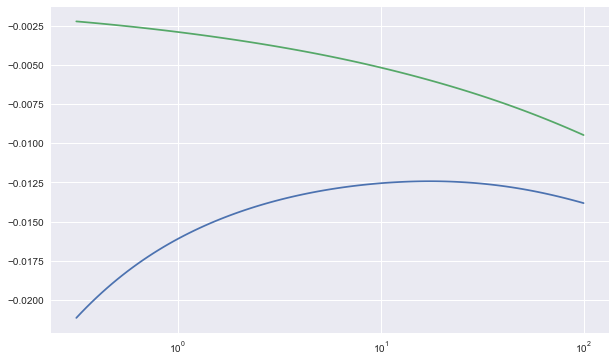

In [825]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

X, y = d, y_d

param_range = np.logspace(-0.5, 2, 100)
train_scores, test_scores = validation_curve(
    linear_model.Ridge(), X, y, param_name="alpha", param_range=param_range,
    cv=5, scoring="neg_mean_squared_error", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.semilogx(param_range,pd.DataFrame({'train' : train_scores_mean, 'test' : test_scores_mean}))
plt.show()

plt.show()

In [826]:
balck = linear_model.Ridge(alpha = param_range[np.argmax(test_scores_mean)])
balck.fit(d, y_d)
param_range[np.argmax(test_scores_mean)]

17.47528400007684

In [827]:
balck_pre = balck.predict(dt)
balck_pre_final = pd.DataFrame(np.exp(balck_pre),columns =["SalePrice"])
balck_pre_finald = pd.concat([balck_pre_final,dt_ID],axis=1)
balck_pre_finald.head()

,SalePrice,Id
0,177637.435717,1463
1,197971.247891,1464
2,179403.722601,1466
3,160599.822956,1467
4,170043.349997,1468


Automatically created module for IPython interactive environment


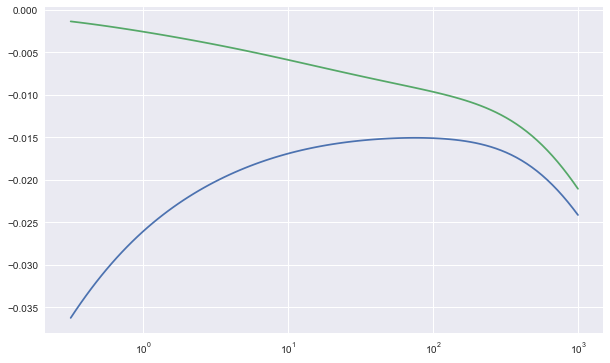

In [749]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

X, y = e, y_e

param_range = np.logspace(-0.5, 3, 100)
train_scores, test_scores = validation_curve(
    linear_model.Ridge(), X, y, param_name="alpha", param_range=param_range,
    cv=5, scoring="neg_mean_squared_error", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.semilogx(param_range,pd.DataFrame({'train' : train_scores_mean, 'test' : test_scores_mean}))
plt.show()

plt.show()

In [750]:
balck = linear_model.Ridge(alpha = param_range[np.argmax(test_scores_mean)])
balck.fit(e, y_e)
param_range[np.argmax(test_scores_mean)]

73.907220335257747

In [755]:
balck_pre = balck.predict(et)
balck_pre_final = pd.DataFrame(np.exp(balck_pre),columns =["SalePrice"])
balck_pre_finale = pd.concat([balck_pre_final,et_ID],axis=1)
balck_pre_finale.head()

,SalePrice,Id
0,200247.117136,1488
1,170884.490910,1489
2,214523.793903,1490
3,217862.587859,1496
4,190651.418561,1497


Automatically created module for IPython interactive environment


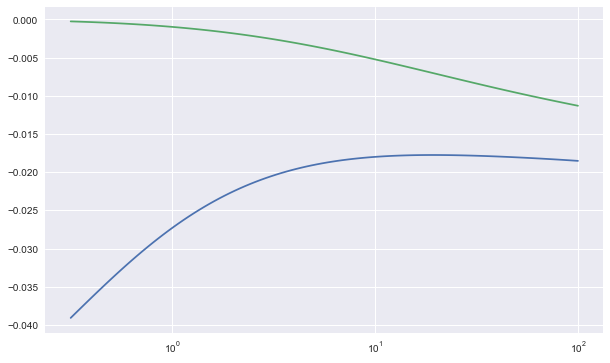

In [752]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

X, y = f, y_f

param_range = np.logspace(-0.5, 2, 100)
train_scores, test_scores = validation_curve(
    linear_model.Ridge(), X, y, param_name="alpha", param_range=param_range,
    cv=5, scoring="neg_mean_squared_error", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.semilogx(param_range,pd.DataFrame({'train' : train_scores_mean, 'test' : test_scores_mean}))
plt.show()

plt.show()

In [753]:
balck = linear_model.Ridge(alpha = param_range[np.argmax(test_scores_mean)])
balck.fit(f, y_f)
param_range[np.argmax(test_scores_mean)]

19.630406500402703

In [756]:
balck_pre = balck.predict(ft)
balck_pre_final = pd.DataFrame(np.exp(balck_pre),columns =["SalePrice"])
balck_pre_finalf = pd.concat([balck_pre_final,ft_ID],axis=1)
balck_pre_finalf.head()

,SalePrice,Id
0,194848.953411,1506
1,256845.254122,1507
2,204159.100319,1508
3,168360.409822,1509
4,194136.079197,1638


Automatically created module for IPython interactive environment


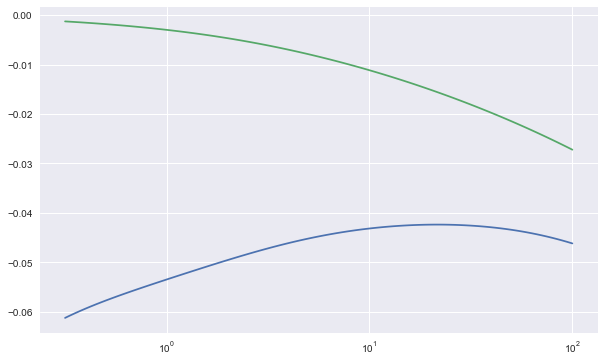

In [828]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

X, y = g, y_g

param_range = np.logspace(-0.5, 2, 100)
train_scores, test_scores = validation_curve(
    linear_model.Ridge(), X, y, param_name="alpha", param_range=param_range,
    cv=5, scoring="neg_mean_squared_error", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.semilogx(param_range,pd.DataFrame({'train' : train_scores_mean, 'test' : test_scores_mean}))
plt.show()

plt.show()

In [829]:
balck = linear_model.Ridge(alpha = param_range[np.argmax(test_scores_mean)])
balck.fit(g, y_g)
param_range[np.argmax(test_scores_mean)]

22.051307399030456

In [830]:
balck_pre = balck.predict(gt)
balck_pre_final = pd.DataFrame(np.exp(balck_pre),columns =["SalePrice"])
balck_pre_finalg = pd.concat([balck_pre_final,gt_ID],axis=1)
balck_pre_finalg.head()

,SalePrice,Id
0,116854.144796,1531
1,92652.827707,1532
2,137838.999350,1533
3,116582.127772,1534
4,164377.873974,1535


Automatically created module for IPython interactive environment


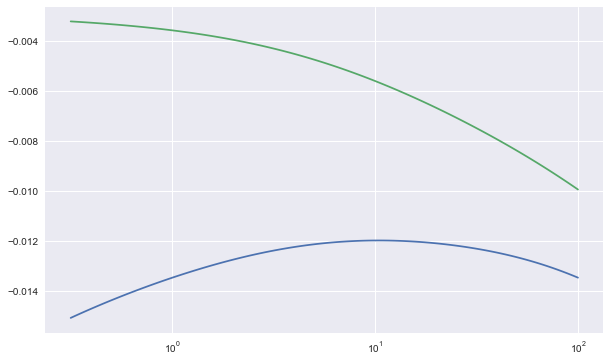

In [831]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

X, y = h, y_h

param_range = np.logspace(-0.5, 2, 100)
train_scores, test_scores = validation_curve(
    linear_model.Ridge(), X, y, param_name="alpha", param_range=param_range,
    cv=5, scoring="neg_mean_squared_error", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.semilogx(param_range,pd.DataFrame({'train' : train_scores_mean, 'test' : test_scores_mean}))
plt.show()

plt.show()

In [832]:
balck = linear_model.Ridge(alpha = param_range[np.argmax(test_scores_mean)])
balck.fit(h, y_h)
param_range[np.argmax(test_scores_mean)]

10.355033664891309

In [833]:
balck_pre = balck.predict(ht)
balck_pre_final = pd.DataFrame(np.exp(balck_pre),columns =["SalePrice"])
balck_pre_finalh = pd.concat([balck_pre_final,ht_ID],axis=1)
balck_pre_finalh.head()

,SalePrice,Id
0,130130.784515,1461
1,146452.252840,1462
2,122073.599365,1470
3,175475.585542,1471
4,145136.207824,1474


Automatically created module for IPython interactive environment


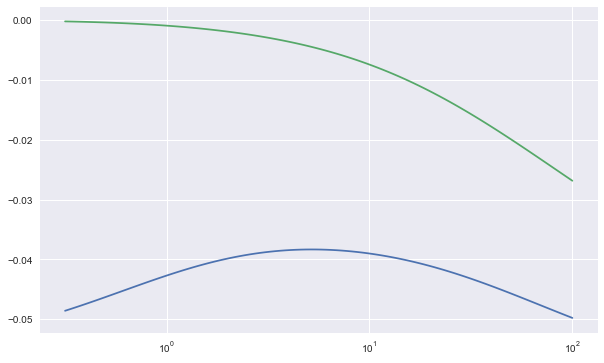

In [834]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

X, y = i, y_i

param_range = np.logspace(-0.5, 2, 100)
train_scores, test_scores = validation_curve(
    linear_model.Ridge(), X, y, param_name="alpha", param_range=param_range,
    cv=5, scoring="neg_mean_squared_error", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.semilogx(param_range,pd.DataFrame({'train' : train_scores_mean, 'test' : test_scores_mean}))
plt.show()

plt.show()

In [835]:
balck = linear_model.Ridge(alpha = param_range[np.argmax(test_scores_mean)])
balck.fit(i, y_i)
param_range[np.argmax(test_scores_mean)]

5.1537246559616348

In [836]:
balck_pre = balck.predict(it)
balck_pre_final = pd.DataFrame(np.exp(balck_pre),columns =["SalePrice"])
balck_pre_finali = pd.concat([balck_pre_final,it_ID],axis=1)
balck_pre_finali.head()

,SalePrice,Id
0,108088.466327,1569
1,137513.697851,1570
2,104521.111333,1571
3,132543.115106,1572
4,128534.540970,1573


In [837]:
final = pd.concat([balck_pre_finala,balck_pre_finalb,balck_pre_finalc,balck_pre_finald,balck_pre_finalg,balck_pre_finalh,balck_pre_finali],axis=0)
final = final.sort_values('Id', ascending=1)
final.to_csv('123.csv',index=False)